## Ten Index funds exploratory data analysis  2010 to 2019

In [54]:
# !pip install pandas-datareader

In [55]:
from pandas_datareader import data, wb
import pandas as pd
import numpy as np
import datetime
import seaborn as sns
%matplotlib inline

In [56]:
start =datetime.datetime(2010,1,1)
end =datetime.datetime(2019,12,31)

In [57]:
#Google finance doesn’t provide common index data download. The Stooq site has the data
IGM = data.DataReader('IGM','yahoo', start, end)
IHI = data.DataReader('IHI','yahoo', start, end)
IVV = data.DataReader('IVV','yahoo', start, end)
IYC = data.DataReader('IYC','yahoo', start, end)
IYW = data.DataReader('IYW','yahoo', start, end)
MDY = data.DataReader('MDY','yahoo', start, end)
ONEQ = data.DataReader('ONEQ','yahoo', start, end)
SOXX = data.DataReader('SOXX','yahoo', start, end)
VGT = data.DataReader('VGT','yahoo', start, end)
VOO = data.DataReader('VOO','yahoo', start, end)


In [58]:
tickers = ['IGM','IHI','IVV','IYC','IYW','MDY','ONEQ','SOXX','VGT','VOO']

In [59]:
funds = pd.concat([IGM,IHI,IVV,IYC,IYW,MDY,ONEQ,SOXX,VGT,VOO], axis=1,keys=tickers)
funds.head()

IGM                                                       \
                 High        Low       Open      Close   Volume  Adj Close   
Date                                                                         
2010-01-04  55.130001  54.660000  54.860001  54.990002  45100.0  51.147377   
2010-01-05  55.119999  54.630001  55.009998  54.980000  55800.0  51.138092   
2010-01-06  55.020000  54.430000  54.959999  54.549999  97200.0  50.738136   
2010-01-07  54.529999  54.090000  54.480000  54.299999  44800.0  50.505615   
2010-01-08  54.790001  54.099998  54.169998  54.770000  66000.0  50.942760   

                  IHI                                   ...        VGT  \
                 High        Low       Open      Close  ...       Open   
Date                                                    ...              
2010-01-04  53.630001  53.310001  53.599998  53.480000  ...  55.549999   
2010-01-05  53.830002  53.380001  53.380001  53.779999  ...  55.810001   
2010-01-06  54.450001  53.799999  53.799999  54.389999  ...  55.759998   
2010-01-07  54.639999  54.299999  54.340000  54.630001  ...  55.290001   
2010-01-08  54.689999  54.450001  54.529999  54.689999  ...  54.970001   

                                            VOO                        \
                Close    Volume  Adj Close High Low Open Close Volume   
Date                                                                    
2010-01-04  55.799999  270600.0  49.968803  NaN NaN  NaN   NaN    NaN   
2010-01-05  55.740002  520800.0  49.915070  NaN NaN  NaN   NaN    NaN   
2010-01-06  55.349998  223000.0  49.565826  NaN NaN  NaN   NaN    NaN   
2010-01-07  55.139999  237100.0  49.377769  NaN NaN  NaN   NaN    NaN   
2010-01-08  55.570000  168900.0  49.762840  NaN NaN  NaN   NaN    NaN   

                      
           Adj Close  
Date                  
2010-01-04       NaN  
2010-01-05       NaN  
2010-01-06       NaN  
2010-01-07       NaN  
2010-01-08       NaN  

[5 rows x 60 columns]

In [60]:
funds.columns.names = ['funds Ticker','Stock Info']

## EDA

In [61]:
funds.xs(key='Close', axis=1, level='Stock Info').max()

funds Ticker
IGM     243.979996
IHI     265.670013
IVV     324.320007
IYC     229.889999
IYW     233.990005
MDY     376.309998
ONEQ    351.309998
SOXX    252.820007
VGT     245.729996
VOO     296.670013
dtype: float64

In [62]:
returns =pd.DataFrame()

In [63]:
for tick in tickers:
    returns[tick+' Return'] = funds[tick]['Close'].pct_change()
    
returns.head()

IGM Return  IHI Return  IVV Return  IYC Return  IYW Return  \
Date                                                                     
2010-01-04         NaN         NaN         NaN         NaN         NaN   
2010-01-05   -0.000182    0.005610    0.002904    0.001788   -0.001539   
2010-01-06   -0.007821    0.011343    0.000790   -0.001607   -0.007021   
2010-01-07   -0.004583    0.004413    0.004383    0.007152   -0.003794   
2010-01-08    0.008656    0.001098    0.003404   -0.000355    0.007616   

            MDY Return  ONEQ Return  SOXX Return  VGT Return  VOO Return  
Date                                                                      
2010-01-04         NaN          NaN          NaN         NaN         NaN  
2010-01-05    0.002538     0.000880    -0.001605   -0.001075         NaN  
2010-01-06    0.005436    -0.004944    -0.003015   -0.006997         NaN  
2010-01-07    0.004740     0.000331    -0.007863   -0.003794         NaN  
2010-01-08    0.006266     0.007726     0.015038    0.007798         NaN

/opt/conda/envs/Python36/lib/python3.6/site-packages/numpy/lib/histograms.py:754: RuntimeWarning:

invalid value encountered in greater_equal

/opt/conda/envs/Python36/lib/python3.6/site-packages/numpy/lib/histograms.py:755: RuntimeWarning:

invalid value encountered in less_equal



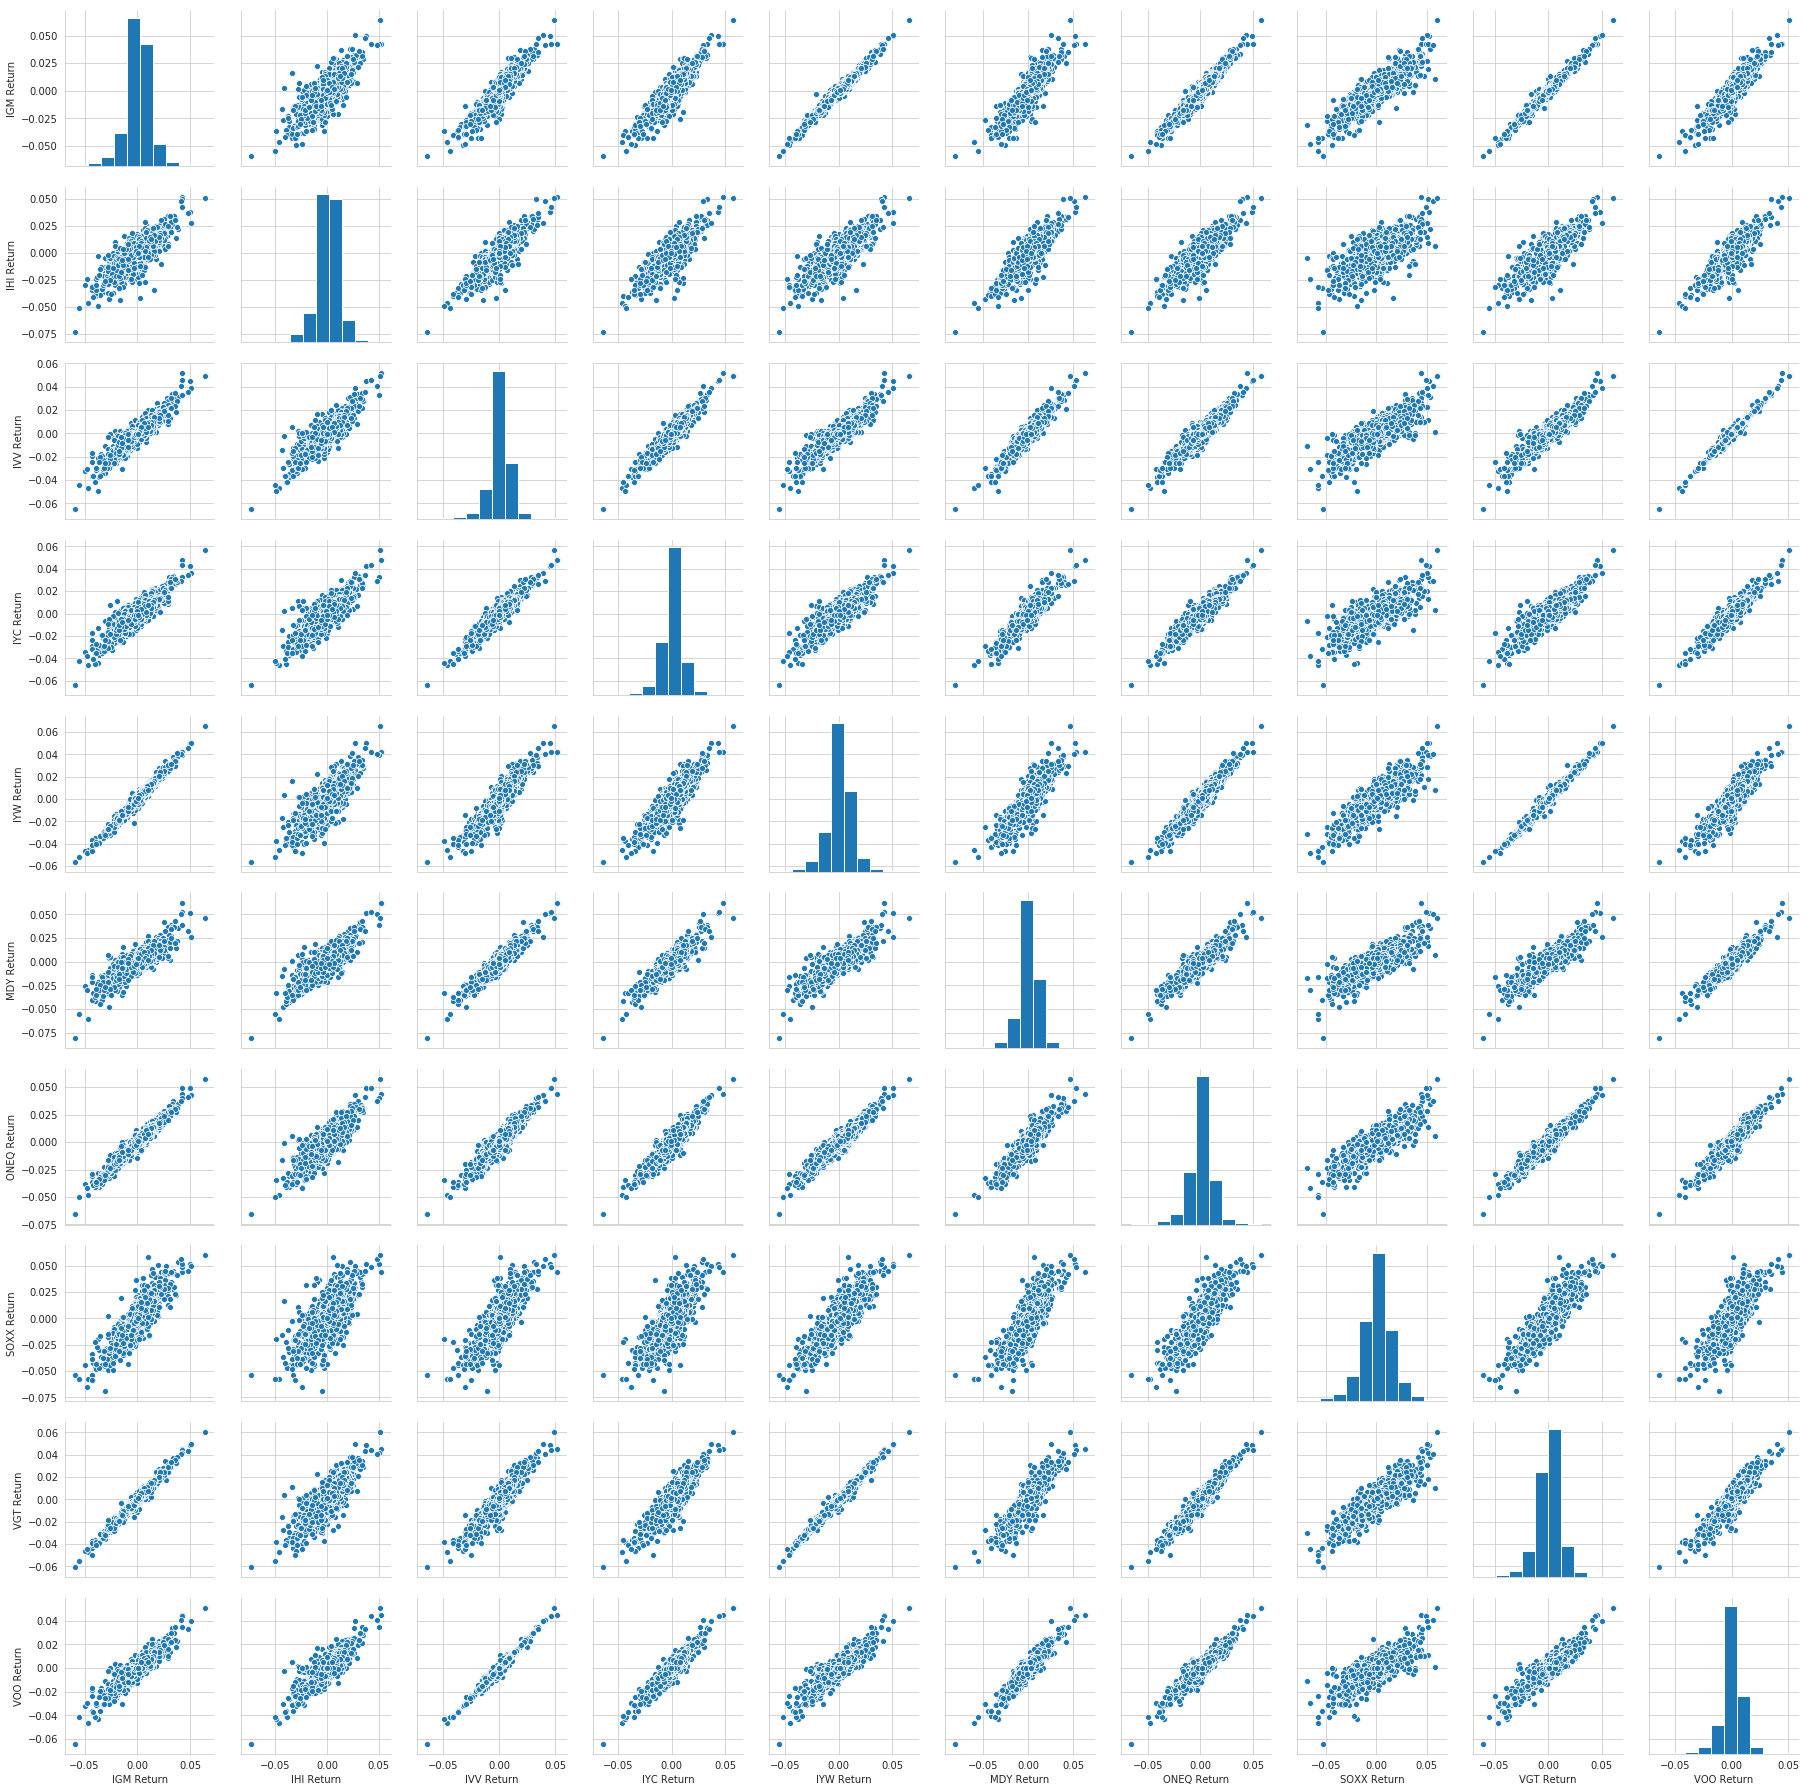

In [64]:
sns.pairplot(returns[1:])

In [65]:
returns.idxmin()

IGM Return    2011-08-08
IHI Return    2011-08-08
IVV Return    2011-08-08
IYC Return    2011-08-08
IYW Return    2011-08-08
MDY Return    2011-08-08
ONEQ Return   2011-08-08
SOXX Return   2014-10-10
VGT Return    2011-08-08
VOO Return    2011-08-08
dtype: datetime64[ns]

In [66]:
returns.idxmax()

IGM Return    2018-12-26
IHI Return    2011-08-09
IVV Return    2011-08-09
IYC Return    2018-12-26
IYW Return    2018-12-26
MDY Return    2011-08-09
ONEQ Return   2018-12-26
SOXX Return   2018-12-26
VGT Return    2018-12-26
VOO Return    2018-12-26
dtype: datetime64[ns]

In [67]:
returns.std()

IGM Return     0.011322
IHI Return     0.010750
IVV Return     0.009311
IYC Return     0.009566
IYW Return     0.011447
MDY Return     0.010678
ONEQ Return    0.010633
SOXX Return    0.015009
VGT Return     0.011289
VOO Return     0.008977
dtype: float64

In [68]:
returns.ix['2015-01-01':'2015-12-31'].std()

/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:1: DeprecationWarning:


.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated



IGM Return     0.011166
IHI Return     0.010444
IVV Return     0.009870
IYC Return     0.009963
IYW Return     0.011733
MDY Return     0.009527
ONEQ Return    0.010543
SOXX Return    0.014335
VGT Return     0.011183
VOO Return     0.009775
dtype: float64

/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:1: DeprecationWarning:


.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated



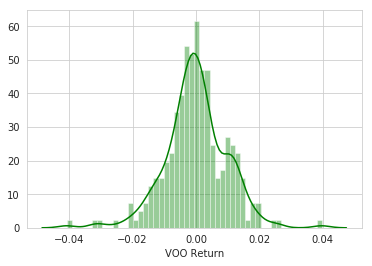

In [69]:
sns.distplot(returns.ix['2015-01-01':'2015-12-31']['VOO Return'],color='g',bins=50)

/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:1: DeprecationWarning:


.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated



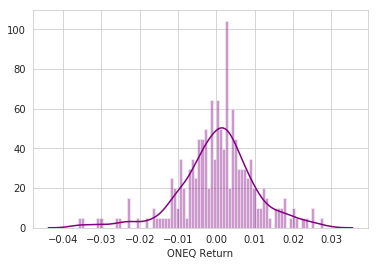

In [70]:
sns.distplot(returns.ix['2016-01-01':'2016-12-31']['ONEQ Return'],color='purple',bins=80)

## Visualization tools

In [71]:
# !pip install plotly
# !pip install cufflinks

In [72]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

# Optional Plotly Method Imports
import plotly
import cufflinks as cf
cf.go_offline()

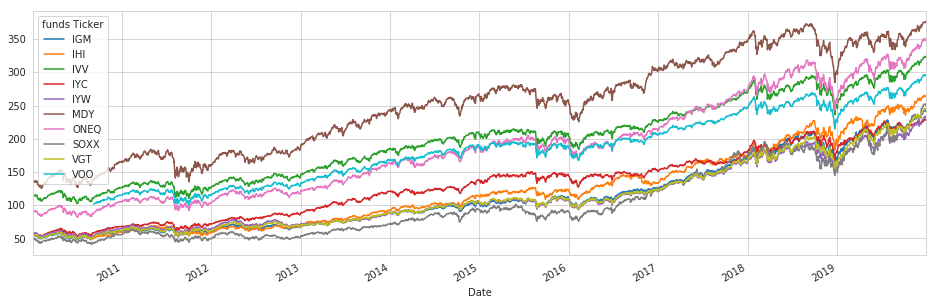

In [73]:
for tick in tickers:
    funds[tick]['Close'].plot(label=tick,figsize=(16,5))
    
plt.legend(title="funds Ticker")

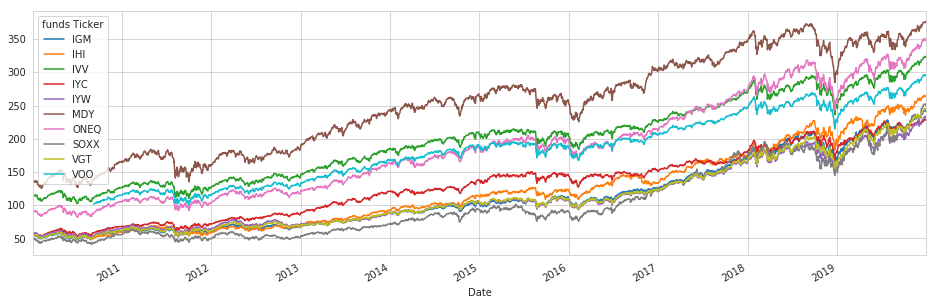

In [74]:
funds.xs(key='Close',axis=1, level='Stock Info').plot(label=tick,figsize=(16,5))

In [75]:
funds.xs(key='Close',axis=1, level='Stock Info').iplot()

/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:1: DeprecationWarning:


.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated

/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:2: DeprecationWarning:


.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated



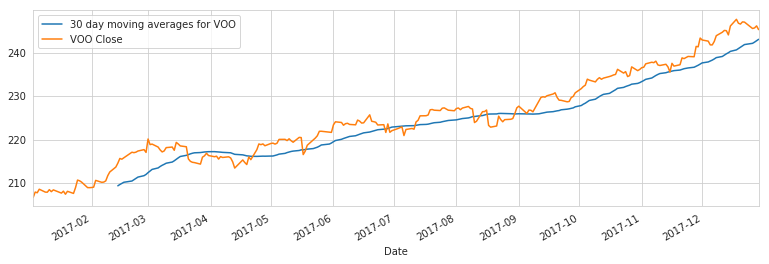

In [76]:
VOO['Close'].ix['2017-01-01':'2018-01-01'].rolling(window=30).mean().plot(figsize=(13,4),label='30 day moving averages for VOO')
VOO['Close'].ix['2017-01-01':'2018-01-01'].plot(label='VOO Close')
plt.legend()

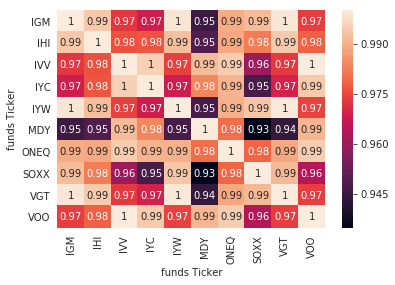

In [77]:
sns.heatmap(funds.xs(key='Close', axis=1, level='Stock Info').corr(),annot=True)

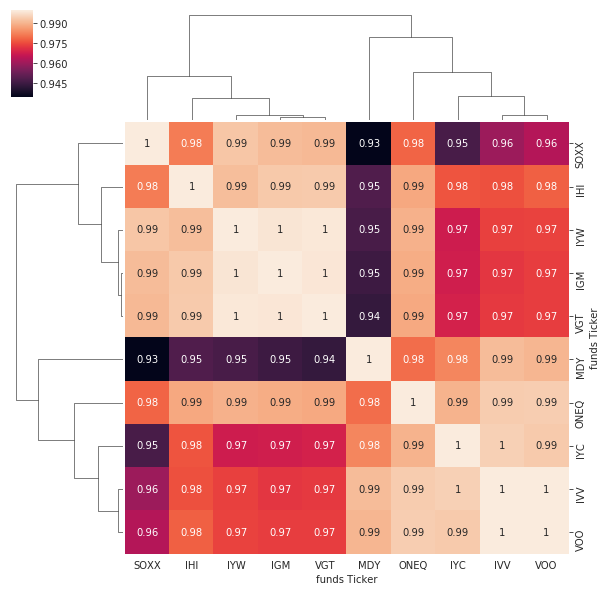

In [78]:
sns.clustermap(funds.xs(key='Close', axis=1, level='Stock Info').corr(),annot=True)

In [79]:
close_corr = funds.xs(key='Close', axis=1, level='Stock Info').corr()

In [80]:
close_corr = funds.xs(key='Close', axis=1, level='Stock Info').corr()

In [81]:
sq18 = IGM[['Open','High','Low','Close']].ix['2018-01-01':'2018-12-31']
sq18.iplot(kind='candle')


/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:1: DeprecationWarning:


.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated



In [82]:
SOXX['Close'].ix['2015-01-01':'2015-12-31'].ta_plot(study='sma',periods=[13,21,55])

/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:1: DeprecationWarning:


.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated



In [83]:
SOXX['Close'].ix['2015-01-01':'2015-12-31'].ta_plot(study='boll',periods=[7,12,21])

/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:1: DeprecationWarning:


.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated

